# <center>Project 2</center>

## <center>Perceptrons</center>

## Task 1: Identifying fake news

<P>Read <a href="https://www.technologyreview.com/s/609717/can-ai-win-the-war-against-fake-news/">this article</a> about how machine learning is being used to detect fake news stories.</P>

<P>Please address (minimum 200 words) the following questions in the space below. What is your definition of "fake news"? When might two different groups of people read the same story with one group understanding it to be "real" and one group understanding it to be "fake"? What are some different ways that fake news might be combatted?</P>

Fake news refers to false or misleading information that is presented as real news. It can be made up, twisted, or manipulated to deceive people.

Two different groups might read the same news story and think it’s "real" or "fake" depending on their beliefs or biases. For example, a political story might seem true to one group who agrees with it but false to another group who disagrees.


To fight fake news, people can be educated on how to spot it and check the sources. Social media platforms can use technology to reduce fake stories and highlight trustworthy ones. Fact-checkers can also help by verifying news and correcting false information. Lastly, AI tools and laws can be used to catch and stop the spread of fake news.







## Task 2: Using Perceptrons to predict survivors of the Titanic

<P>This from <a href="https://www.kaggle.com/c/titanic">Kaggle</a>:

<blockquote>
<P>The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.</P>

<P>One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.</P>
</blockquote>

<P>Together with the downloaded file containing this notebook, you should find a csv file named <code>titanic.csv</code> containing information about passengers on the Titanic and whether the passenger survived the tragedy. The first row of the file contains header information and each subsequent row contains information about a passenger. There are nine columns of feature values, and the tenth column contains labels, -1 or 1, indicating whether the passenger did not survive or did survive, respectively. The features in order of how they appear in the file are:</P>

<ol>
<li>Ticket class, 1=First, 2=Second, 3=Third</li>
<li>Sex, 0=male, 1=female</li>
<li>Age in years</li>
<li>Number of siblings and spouses aboard the Titanic</li>
<li>Number of parents and children aboard the Titanic</li>
<li>Passenger fare in dollars</li>
<li>Whether the passenger's port of embarkation was Cherbourg</li>
<li>Whether the passenger's port of embarkation was Queenstown</li>
<li>Whether the passenger's port of embarkation was Southampton</li>
</ol>
<P>In this task, you will use the <code>sklearn</code> perceptron algorithm to predict whether a passenger survived the Titanic.</P>

<P>Write code in the space below to read in the <code>titanic.csv</code> file and store the feature vectors in an array <code>X</code> and the labels in an array <code>y</code>.</P>

In [23]:
# Read in data and store feature vectors in array X and labels in array y
import numpy as np
DATA = np.loadtxt('titanic.csv', delimiter=',', skiprows=1)  
y = DATA[:, -1]  
X = DATA[:, :-1]  




In [24]:
X.shape

(891, 9)

<P>Write code in the space below to split the data into <em>training</em> and <em>testing</em> data. Use 80% of the data for <em>training</em> and 20% of the data for <em>testing</em>. You may use the <code>train_test_split</code> function from <code>sklearn</code> here. Set <code>random_state=0</code> for consistent results.</P>

In [26]:
# Split data into 80% training and 20% testing. Set random_state=0.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

<P>Write code in the space below that uses <code>sklearn</code> to create a Perceptron, setting the number of epochs to be 20 and the random_state to be 0. Train the perceptron on the <em>training</em> data. Once trained, report the accuracy of the perceptron first on classifying the <em>training</em> data and second on classifying the <em>testing</em> data. Finally, print out the weights for the 9 features, as learned by the Perceptron.</P>

In [30]:
# Create sklearn Perceptron with 20 epochs.
# Train perceptron and report its classification accuracy on both training data and testing data.
# Output weights of 9 features as learned by the Perceptron.
from sklearn import linear_model
from sklearn.feature_extraction.text import TfidfVectorizer
learner = linear_model.Perceptron(max_iter=20, random_state=0)
learner.fit(X_train, y_train)

print('training accuracy', learner.score(X_train, y_train))
print('test accuracy', learner.score(X_test, y_test))
#weights
weights = learner.coef_ 

print(weights)




training accuracy 0.7696629213483146
test accuracy 0.8212290502793296
[[ -52.      758.      -16.74   -470.      -83.       30.1803   47.
    78.      -74.    ]]


<P>Please answer the following questions.</P>

<P><font color="maroon"><u>Are the feature vectors linearly separable? How do you know?</u></font></P>

Yes though the line doesn't perfectly seperate becuase the accuracy is 82%. If the data were perfectly linearly separable, the Perceptron would achieve 100% training accuracy (since it learns a single hyperplane that perfectly divides the classes)

<P><font color="maroon"><u>Based on the 9 feature weights, what feature contributes most toward predicting survival?</u></font></P>

the feauture with the weight:758 which corresponds to the sex feauture  


<P><font color="maroon"><u>Were younger or older passengers more likely to survive?</u></font></P>

since the w associated with age is negative the older passengers were less likely to survive

<P><font color="maroon"><u>Were passengers that paid a higher fare more likely to survive?</u></font></P>

Yes! the weight is positive(30.1803) so it increases likelihood of survival 


<P><font color="maroon"><u>Passengers were most likely to survive if they embarked from which of the three ports?</u></font></P>

Queenstown


## Task 3: Implementing your own Perceptron

<P>In this task, you will implement your own perceptron learning algorithm. You may use the <code>numpy</code> and <code>matplotlib</code> libraries, but <font color="red">you should <em>not</em> use any part of the <code>sklearn</code> library</font>.

<P>The file <code>dataset.csv</code> contains 500 examples labeled either as -1 or 1. The examples have 2-dimensional feature vectors, i.e., two features each. The file contains a header line. Write code below to read in the file and store the feature vectors in an array <code>X</code> and the labels in an array <code>y</code>. In order to visualize the data (since it is two-dimensional), you should also plot the data as a scatter plot using the <code>matplotlib</code> function <code>scatter</code>. When plotting the data with the <code>scatter</code> function, you can set the color of points based on their labels (-1 or 1) in the <code>y</code> array by providing the argument "<code>c=y</code>".</P>

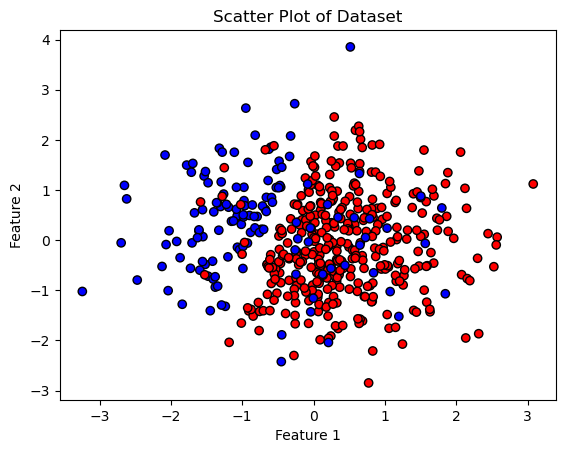

In [75]:
# Read in data and store feature vectors in array X and labels in array y.
# Also display scatter plot of data.

import matplotlib.pyplot as plt

data = np.loadtxt('dataset.csv', delimiter=',', skiprows=1) 

X = data[:, :-1]  
y = data[:, -1]   

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k')  
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter Plot of Dataset')
plt.show()









In [76]:
X.shape

(500, 2)

<P>Write a function <code>shuffle</code> that takes as input two arrays <code>X</code> and <code>y</code> with the same number of rows and returns two arrays containing the same data as the input arrays but with their rows randomly permuted. Hint: the <code>numpy</code> function <code>random.shuffle</code> may be useful. However, if you shuffle the two arrays independently then labels in the <code>y</code> array won't correspond to the feature vectors in the <code>X</code> array. As an alternative, one approach is to combine the two arrays into a single array (e.g., with the <code>numpy</code> function either <code>hstack</code> or <code>concatenate</code>), randomly shuffle this array, and then split the array back into two arrays <code>X</code> and <code>y</code>.</P>

In [35]:
# shuffle function takes two arrays, X and y, as input,
# and returns versions of the two arrays where their rows have been randomly permuted

def shuffle(X, y):
    
    Z = np.hstack((X, y.reshape(-1, 1)))  

    np.random.shuffle(Z)  
    
    X = Z[:, :-1]  
    y = Z[:, -1]   

    return X, y




(array([[-6.23140e-01, -5.55480e-01],
        [-3.20350e-01,  4.24170e-01],
        [-1.15099e+00,  3.75700e-01],
        [-4.69200e-02,  4.77040e-01],
        [-7.04340e-01, -1.40846e+00],
        [-1.55066e+00,  6.85600e-02],
        [ 1.27766e+00, -5.91570e-01],
        [ 1.84896e+00,  1.12657e+00],
        [ 2.71580e-01, -1.27675e+00],
        [-3.92110e-01, -1.46351e+00],
        [ 8.33920e-01,  4.59180e-01],
        [-1.44808e+00, -1.40746e+00],
        [-1.71313e+00,  1.35387e+00],
        [ 1.84664e+00, -1.07008e+00],
        [ 1.13520e-01,  6.62130e-01],
        [ 1.17930e+00,  6.75200e-02],
        [ 8.65900e-02, -1.55680e-01],
        [-4.45500e-01,  1.45338e+00],
        [-4.87610e-01, -4.32560e-01],
        [ 8.40640e-01, -6.52620e-01],
        [-5.55200e-01,  1.88116e+00],
        [ 1.64497e+00, -2.49040e-01],
        [-7.71000e-02,  3.41150e-01],
        [ 3.26930e-01, -2.19100e-01],
        [ 5.69770e-01,  4.47710e-01],
        [ 1.20651e+00, -8.16940e-01],
        [ 6.

<P>Write code to split the data into four arrays (<code>X_train</code>, <code>y_train</code>, <code>X_test</code>, and <code>y_test</code>) so that 60% of the data corresponds to <em>training</em> data and 40% of the data corresponds to <em>testing</em> data. Of course, before splitting the data into <em>training</em> data and <em>testing</em> data, you should first shuffle the arrays <code>X</code> and <code>y</code> to guard against the case when the data was stored in the file in some sorted order (we want the <em>training</em> and <em>testing</em> data both to be representative of the entire data distribution).</P>

In [77]:
# Shuffle data and then separate data into 60% training data and 40% testing data

X,y=shuffle(X,y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=0)



<P>In the next part, you will be writing a function to train a perceptron. For now, you'll write a <em>simplified</em> version where the bias term is set to zero and never updated. Also, in this simplified version, you will <em>not</em> shuffle the data each epoch. In later versions, you will write more advanced perceptron training functions that update the bias term, shuffle the data each epoch, and compute <em>averaged</em> perceptrons. Ultimately, we'll execute both simplified and advanced versions of the perceptron training algorithm and see how the results change as we add more advanced aspects to the training algorithm.</P>

<P>Write a function <code>perceptron_train_version1</code> that trains a perceptron. The function should take as input an array <code>X</code> of feature vectors and an array <code>y</code> of labels. It should implement the perceptron training algorithm which learns a weight vector <code>w</code> that defines a separating hyperplane. The number of epochs should be 20. The function should <em>not</em> learn or update a bias term (we'll get to this later). The function should set a bias term <code>b</code> to be 0 and never change it. The function also should <em>not</em> shuffle data at any point (we'll get to this later, too). The function should return two elements, the learned weight vector <code>w</code> and a bias term <code>b</code>, which simply has the value of zero.</P>

In [78]:
# The perceptron_train_version1 function takes an array X of feature vectors and an array y of labels as input.
# The function trains a perceptron. The number of epochs should be 20.
# The function returns the weight vector w that it learns as well as a bias term of 0.


def perceptron_train_version1(X, y, epochs=20):
    
    w = np.zeros(X.shape[1])
    b = 0  
    for epoch in range(epochs):  
        for i in range(len(X)):  
            prediction = np.dot(w, X[i])

            if y[i] * prediction <= 0:  
                w += y[i] * X[i] 

    return w, b 


In [56]:
X_test.shape[]

(200, 2)

<P>Write a function <code>predict</code> that predicts the class of a data point. The function should take three inputs: a weight vector <code>w</code>, a bias term <code>b</code>, and a single feature vector <code>x</code>. The weight vector <code>w</code> and the feature vector <code>x</code> should have the same size. The function should compute the appropriate weighted sum and then apply the activation function so that either -1 or 1 is returned.</P>

In [63]:
# Using a weight vector w and a bias term b, the predict function 
# predicts the class of a data point x, returning either -1 or 1.


def predict(w, b, x):

    wsum = np.dot(w, x) + b
    if wsum >= 0:
        return 1 
    else:
        return -1 

        
    
    


<P>Write a function <code>score</code> that takes four inputs, a weight vector <code>w</code>, a bias term <code>b</code>, an array <code>X</code> of feature vectors and an array <code>y</code> of labels. The function uses the weight vector <code>w</code> and the bias term <code>b</code> to make classification predictions for each feature vector in <code>X</code>. The predictions are compared to the labels in <code>y</code> and the accuracy is returned, i.e., the percentage of predictions that correctly correspond to labels in <code>y</code> is returned.</P>

In [58]:
# The score function uses the weight vector w and the bias term b 
# to predict the class of each feature vector in X.
# The predicted classes are compared to the labels in y and the accuracy of the predictions is returned.

def score(w, b, X, y):

    correct_preds = 0  

    for i in range(len(X)):
        prediction = predict(w, b, X[i])
        if prediction == y[i]:
            correct_preds += 1  
    accuracy = correct_preds / len(X) * 100
    return accuracy





<P>Use your <code>perceptron_train_version1</code> function to train a perceptron on the <em>training</em> data. Then use the <code>score</code> function to assess the accuracy of the perceptron first on the <em>training</em> data and second on the <em>testing</em> data.</P>

In [64]:
# Assess the accuracy of your perceptron (version 1) on the training data and on the testing data
# Train perceptron on training data
w, b = perceptron_train_version1(X_train, y_train)

train_accuracy = score(w, b, X_train, y_train)
test_accuracy = score(w, b, X_test, y_test)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:",test_accuracy )



Training Accuracy: 68.00%
Testing Accuracy: 74.50%


In [79]:
# Assess the accuracy of your perceptron (version 1) on the training data and on the testing data
# Train perceptron on training data
w, b = perceptron_train_version1(X_train, y_train)

train_accuracy = score(w, b, X_train, y_train)
test_accuracy = score(w, b, X_test, y_test)

# Print the results
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:",test_accuracy )


Training Accuracy: 69.67%
Testing Accuracy: 81.00%


<P><font color="maroon"><u>What is the accuracy of your <em>version1</em> perceptron on the <em>training</em> data?</u></font></P>
<P><font color="maroon"><u>What is the accuracy of your <em>version1</em> perceptron on the <em>testing</em> data?</u></font></P>

Training accuracy (version 1): 68.00%
Testing accuracy (version 1): 74.50%

<P>Write a function <code>perceptron_train_version2</code> that trains a perceptron but this time, unlike version 1 above, the function should update the bias term. The function should take as input an array <code>X</code> of feature vectors and an array <code>y</code> of labels. It should implement the perceptron training algorithm which learns a weight vector <code>w</code> <em>and</em> a bias term <code>b</code>. The number of epochs should be 20. The function should <em>not</em> shuffle data at any point (we'll get to this later). The function should return two elements, the learned weight vector <code>w</code> and the learned bias term <code>b</code>.</P>

In [66]:
# The perceptron_train_version2 function takes an array X of feature vectors and an array y of labels as input.
# The function trains a perceptron. The number of epochs should be 20.
# The function returns the weight vector w and the bias term b that it learns.


def perceptron_train_version2(X, y, epochs=20):
    
    w = np.zeros(X.shape[1])
    b = 0 
    for epoch in range(epochs):  
        for i in range(len(X)): 
            prediction = np.dot(w, X[i])+b
            if y[i] * prediction <= 0:  
                w += y[i] * X[i]  
                b += y[i]

    return w, b 





<P>Use your <code>perceptron_train_version2</code> function to train a perceptron on the <em>training</em> data. Then use the <code>score</code> function to assess the accuracy of the perceptron first on the <em>training</em> data and second on the <em>testing</em> data.</P>

In [67]:
# Assess the accuracy of your perceptron (version 2) on the training data and on the testing data
w, b = perceptron_train_version2(X_train, y_train)

train_accuracy = score(w, b, X_train, y_train)
test_accuracy = score(w, b, X_test, y_test)


print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:",test_accuracy)

Training Accuracy: 91.00%
Testing Accuracy: 88.00%


<P><font color="maroon"><u>What is the accuracy of your <em>version2</em> perceptron on the <em>training</em> data?</u></font></P>
<P><font color="maroon"><u>What is the accuracy of your <em>version2</em> perceptron on the <em>testing</em> data?</u></font></P>

Training accuracy (version 2): 91.00%
Testing accuracy (version 2): 88.00%

<P>Write a function <code>perceptron_train_version3</code> that trains a perceptron but this time, unlike version 2 above, the function should shuffle the data at the start of each epoch. The function should take as input an array <code>X</code> of feature vectors and an array <code>y</code> of labels. It should implement the perceptron training algorithm which learns a weight vector <code>w</code> <em>and</em> a bias term <code>b</code>. The number of epochs should be 20. The function should shuffle the data at the start of each epoch. The function should return two elements, the learned weight vector <code>w</code> and the learned bias term <code>b</code>.</P>

In [68]:
# The perceptron_train_version3 function takes an array X of feature vectors and an array y of labels as input.
# The function trains a perceptron. The number of epochs should be 20.
# The data is shuffled at the start of each epoch.
# The function returns the weight vector w and the bias term b that it learns.


def perceptron_train_version3(X, y, epochs=20):
    
    w = np.zeros(X.shape[1])
    b = 0 
    for epoch in range(epochs):  
        X,y= shuffle(X,y)
        for i in range(len(X)): 
            prediction = np.dot(w, X[i])+b

            if y[i] * prediction <= 0:  
                w += y[i] * X[i]  
                b += y[i]

    return w, b 




<P>Use your <code>perceptron_train_version3</code> function to train a perceptron on the <em>training</em> data. Then use the <code>score</code> function to assess the accuracy of the perceptron first on the <em>training</em> data and second on the <em>testing</em> data.</P>

In [69]:
# Assess the accuracy of your perceptron (version 3) on the training data and on the testing data
w, b = perceptron_train_version3(X_train, y_train)

train_accuracy = score(w, b, X_train, y_train)
test_accuracy = score(w, b, X_test, y_test)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:",test_accuracy )


Training Accuracy: 92.67%
Testing Accuracy: 90.00%


<P><font color="maroon"><u>What is the accuracy of your <em>version3</em> perceptron on the <em>training</em> data?</u></font></P>
<P><font color="maroon"><u>What is the accuracy of your <em>version3</em> perceptron on the <em>testing</em> data?</u></font></P>

Training accuracy (version 3): 92.67%
Testing accuracy (version 3): 90.00%

<P>Write a function <code>perceptron_train_version4</code> that trains a perceptron but this time, unlike version 3 above, rather than return the final weight vector and bias term, the function will compute an <em>averaged</em> perceptron and return the average weight vector and the average bias term. The function should take as input an array <code>X</code> of feature vectors and an array <code>y</code> of labels. It should implement the <em>averaged</em> perceptron training algorithm which keeps track of the average weight vector and bias term, where the average is over all intermediary weight vectors and bias terms that it computes throughout its learning. From an implementation perspective, accumulator variables <code>mu</code> and <code>beta</code> for the weights and bias, respectively, can be updated <em>every</em> iteration of the loops and then, after the loops terminate, the accumulators can be divided by the total number of iterations (i.e., the number of times the accumulators were updated) in order to compute <em>average</em> values. The number of epochs should be 20. The function should shuffle the data at the start of each epoch. The function should return two elements, the average weight vector and the average bias term.</P>

In [70]:
# The perceptron_train_version4 function takes an array X of feature vectors and an array y of labels as input.
# The function trains a perceptron. The number of epochs should be 20.
# The data is shuffled at the start of each epoch.
# The function implements the *averaged* perceptron learning algorithm.
# The function returns the *average* weight vector w and the *average* bias term b that it learns.


def perceptron_train_version4(X, y, epochs=20):

    w = np.zeros(X.shape[1])  
    b = 0  

    mu = np.zeros(X.shape[1])  
    beta = 0  
    count = 0  

    for epoch in range(epochs):  
        X, y = shuffle(X, y)  

        for i in range(len(X)):  
            prediction = np.dot(w, X[i]) + b  

            if y[i] * prediction <= 0:  
                w += y[i] * X[i] 
                b += y[i] 

            mu += w  
            beta += b  
            count += 1  

    wavg = mu / count  
    bavg = beta / count  
    return wavg, bavg  


<P>Use your <code>perceptron_train_version4</code> function to train a perceptron on the <em>training</em> data. Then use the <code>score</code> function to assess the accuracy of the perceptron first on the <em>training</em> data and second on the <em>testing</em> data.</P>

In [73]:
# Assess the accuracy of your perceptron (version 4) on the training data and on the testing data

w_avg, b_avg= perceptron_train_version4(X_train, y_train)

train_accuracy = score(w_avg, b_avg, X_train, y_train)
test_accuracy = score(w_avg, b_avg, X_test, y_test)

# Print the results
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:",test_accuracy )

Training Accuracy: 92.67%
Testing Accuracy: 90.50%


<P><font color="maroon"><u>What is the accuracy of your <em>version4</em> perceptron on the <em>training</em> data?</u></font></P>
<P><font color="maroon"><u>What is the accuracy of your <em>version4</em> perceptron on the <em>testing</em> data?</u></font></P>

Training accuracy (version 4): 92.67%
Testing accuracy (version 4): 90.50%

<P>Please answer the following question that relates to the relative performance of the perceptron when trained using version 1, version 2, version 3, and version 4:</P>
<P><font color="maroon"><u>Which perceptron training advancement led to the biggest increase in accuracy on the <em>testing</em> data: updating the bias term, shuffling the data at the start of each epoch, using the average weight vector and bias term?</u></font></P>

Your answer here.
Changing the bias term increased the testing accuracy the most 

<P>Throughout this task, you should not have used the <code>sklearn</code> library at all. For this final part, you should now use the <code>sklearn</code> library. Create an <code>sklearn</code> Perceptron setting the number of epochs to be 20 and the random_state to be 0. Train the perceptron on the <em>training</em> data and assess its accuracy on both the <em>training</em> data and the <em>testing</em> data.</P> 

In [74]:
# Create an sklearn Perceptron with the number of epochs set to 20 and the random_state set to 0.
# Train the perceptron and assess its accuracy on both the training data and the testing data.

from sklearn import linear_model
learner = linear_model.Perceptron(max_iter=20, random_state=0)
learner.fit(X_train, y_train)


# accuracy
print('training accuracy', learner.score(X_train, y_train))
print('test accuracy', learner.score(X_test, y_test))








training accuracy 0.8933333333333333
test accuracy 0.885


<P><font color="maroon"><u>What is the accuracy of the <code>sklearn</code> perceptron on the <em>training</em> data?</u></font></P>
<P><font color="maroon"><u>What is the accuracy of the <code>sklearn</code> perceptron on the <em>testing</em> data?</u></font></P>

Training accuracy (sklearn version): 0.893
Testing accuracy (sklearn version):  0.885

<P><font color="maroon"><u>How does the accuracy of your averaged perceptron (version 4) compare with that of <code>sklearn</code>'s perceptron?</u></font></P>

Your answer here.
version 4 is the best interms of the accuracy as it has the highest testing accuracy 